In [1]:
import os

import pandas as pd
from pandasai import SmartDataframe
from pandasai.llm import OpenAI

In [3]:
spreadsheet = "openllm_leaderboard_20230904.csv"

In [6]:
df = pd.read_csv(spreadsheet)
df.head(5)

,Model,Average,ARC(25-shot),HellaSwag(10-shot),MMLU(5-shot),TruthfulQA(0-shot),Parameters,URL
0,uni-tianyan/Uni-TianYan,73.81,72.1,87.4,69.9,65.8,0.0,https://huggingface.co/uni-tianyan/Uni-TianYan
1,fangloveskari/ORCA_LLaMA_70B_QLoRA,73.40,72.3,87.7,70.2,63.4,100.0,https://huggingface.co/fangloveskari/ORCA_LLaM...
2,garage-bAInd/Platypus2-70B-instruct,73.13,71.8,87.9,70.5,62.3,100.0,https://huggingface.co/garage-bAInd/Platypus2-...
3,upstage/Llama-2-70b-instruct-v2,72.95,71.1,87.9,70.6,62.2,100.0,https://huggingface.co/upstage/Llama-2-70b-ins...
4,fangloveskari/Platypus_QLoRA_LLaMA_70b,72.94,72.1,87.5,71.0,61.2,100.0,https://huggingface.co/fangloveskari/Platypus_...


In [5]:
# Create a wrapper of an LLM for PandasAI
llm = OpenAI(api_token=os.environ["OPENAI_API_KEY"], model="gpt-4")
# Then initialize a smart DF for LLM commands
ai_df = SmartDataframe(df, config={"llm": llm})

In [7]:
# Fire away the tough questions
ai_df.chat("Which model performs the best on 0-shot tasks and what is the score?")

'The model that performs the best on 0-shot tasks is uni-tianyan/Uni-TianYan with a score of 65.8.'

In [8]:
ai_df.chat("Which model performs the best on 0-shot tasks and what is the score? What is the second best model?")

'The best model on 0-shot tasks is uni-tianyan/Uni-TianYan with a score of 65.8. The second best model is ehartford/Samantha-1.11-70b with a score of 65.0.'

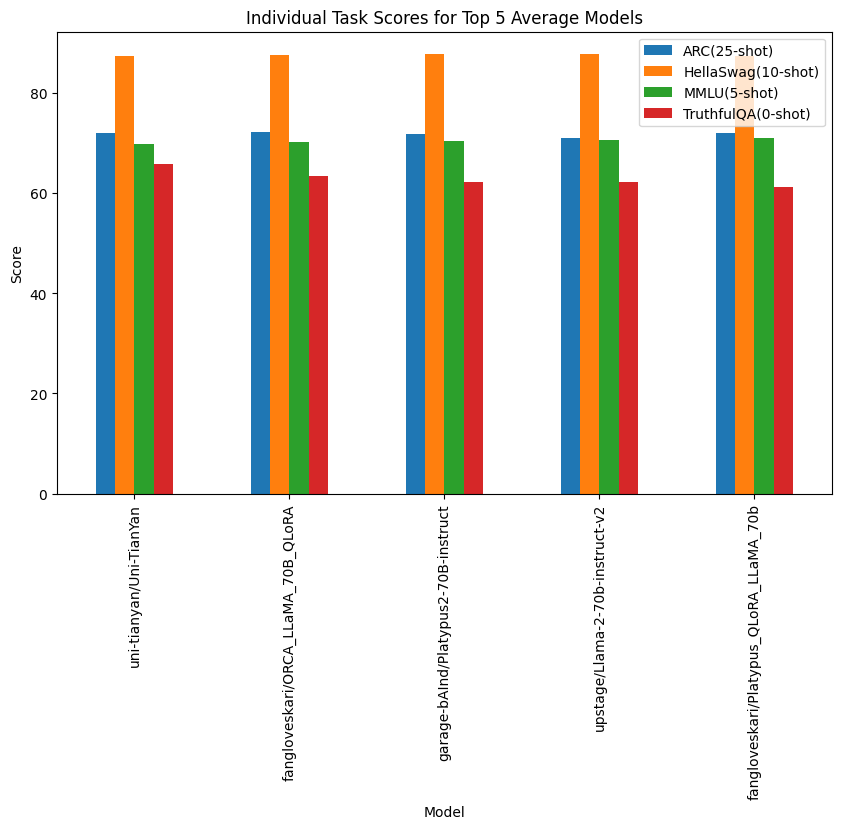

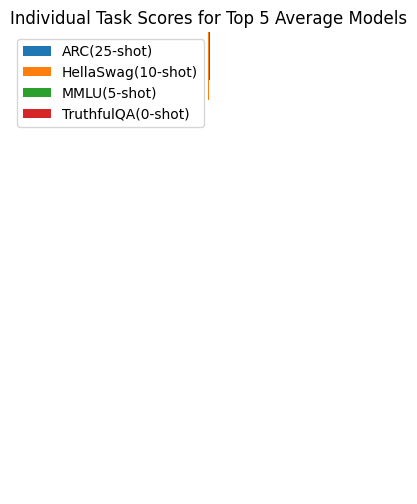

In [9]:
ai_df.chat("Show the barchart of the individual task scores for the top 5 average models")